# STROKE PREDICTION PROJECT
by: JEAN-PIERRE GNIMATIN (www.linkedin.com/in/jean-pierre-gnimatin)




This project aims to predict the likelihood of a patient experiencing a heart stroke by analyzing key features, including comorbidities, work, and lifestyle. We will employ four (04) distinct classification techniques, and their performances will be assessed using essential evaluation metrics such as Accuracy, Precision, Recall, and F1-score.

The dataset utilized in this project is openly accessible on Kaggle: 'https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/ 

The features include:

1) id: unique identifier 2) gender: “Male”, “Female” or “Other” 3) age: age of the patient 4) hypertension: 0 if the patient doesn’t have hypertension, 1 if the patient has hypertension 5) heart_disease: 0 if the patient doesn’t have any heart diseases, 1 if the the patient has a heart disease 6) ever_married: “No” or “Yes” 7) work_type: “children”, “Govt_jov”, “Never_worked”, “Private” or “Self-employed” 8) Residence_type: “Rural” or “Urban” 9) avg_glucose_level: average glucose level in blood 10) BMI: body mass index 11) smoking_status: “formerly smoked”, “never smoked”, “smokes” or “Unknown”* 12) stroke: 1 if the patient had a stroke or 0 if not



## Project Plan:


### 1. Dataset charateristics and pre-process

At this first stage, the characteristics/ description of the features included in the dataset wil be explored. We will search fo missing values and duplicates. Missing data handling will also be done at this level.



### 2. Exploratory Data Analysis (EDA)

At this section, we will conduct a thorough exploratory data analysis to gain insights into the dataset's characteristics. This step involves visualizing and summarizing key statistics to better understand the distribution and relationships among features.The goal is to optimize the dataset for the subsequent classification processes.


### 3. Feature Engineering
Enhance the dataset by implementing feature engineering techniques. This step involves transforming, creating, or selecting features that can contribute to the predictive accuracy of the models. 


### 4. Prediction (Classification Techniques)

Here, we will apply 4 classification techniques including Logistic Regression (LoR), Support Vector Machine (SVM), Random Forest (RF), and Decision Tree to predict the occurrence of heart strokes based on the refined dataset. Evaluate the performance of each model using crucial metrics such as Accuracy, Precision, Recall, and F1-score. This stage will provide a comprehensive assessment of the models' effectiveness in predicting heart strokes.


### Importing libraries

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns


### Importing dataset

In [2]:
#Importing the dataset
data = pd.read_csv("data.csv")

#Head
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# 1. Dataset charateristics and Feature engineering

In [3]:
# drop id column
data = data.drop(['id'], axis=1)

In [4]:
#Show head again after the ID column is removed
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
print("data shape", data.shape)

print("-----------------------------------------")

print("data info", data.info())

print("-----------------------------------------")

print("Dataset description", data.describe())

data shape (5110, 11)
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
data info None
-----------------------------------------
Dataset description                age  hypertension  heart_disease  avg_glucose_lev

In [6]:
# Check missing values in the features included in the dataset
print("Missing values", data.isnull().sum())

print("-----------------------------------------")

#Check for duplicates
print (" Duplicates", data.duplicated().sum())

Missing values gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
-----------------------------------------
 Duplicates 0


In [7]:
# Input missing values in BMI

data["bmi"].fillna(data["bmi"].mean(), inplace= True)

# Verification

print("Missing values", data.isnull().sum())

Missing values gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## **Initial info from the dataset:** 

The dataset comprises 5110 rows and 11 columns or features, excluding the "id" that has been removed. Notably, there are no duplicate entries. However, it's worth noting that the "BMI" feature contains 201 missing values, which we addressed in the preceding step by imputing the mean. Various methods can be employed for handling missing values, such as deletion, imputation using mean/median, or utilizing advanced techniques like KNN imputation.

Furthermore, as part of data preprocessing, we will ensure that data types are appropriately encoded before engaging in Exploratory Data Analysis (EDA) and model predictions. This step is crucial for enhancing the accuracy and effectiveness of subsequent analyses and machine learning models.

#  2. Exploratory Data Analysis (EDA)

Here we will first do the EDA using ydata-profiling (Authomated method), then we will do the EDA with cliassical methods

In [8]:
# Changing data types for EDA
# We will run the EDA with the dataset df
df=data


 ### categorical features (Replace 1, 0 by YES AND NO to facilitate EDA)
df['stroke'].replace({1: "Yes", 0: "No"}, inplace=True)
df['hypertension']= data['hypertension'].replace({1: "Yes", 0: "No"})
df['heart_disease']= data['heart_disease'].replace({1:"Yes", 0:"No"})

 ### continuous features
df["age"]= data["age"].astype(int) #from float to int

In [9]:
# Show headof updated dataset
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,Yes
1,Female,61,No,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Yes
2,Male,80,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,Yes



 **To be more efficient, we will use ydata-profiling to get the EDA report profile with a few lines** (Automatized method)

In [10]:
#pip Install ydata-profiling 
 ## pip install ydata-profiling

from ydata_profiling import ProfileReport
ProfileReport(df, title="Stroke data EDA Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

###  **Classical EDA Method** 

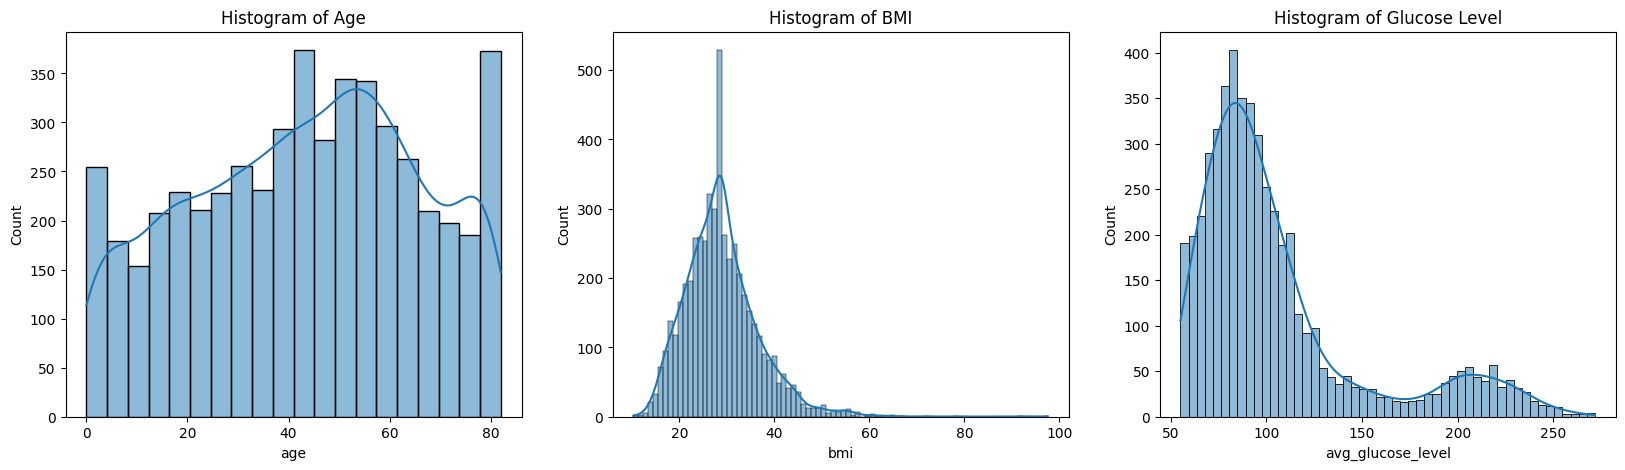

In [11]:
# Univariate analysis of Continuous features

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Plot histograms for Age, BMI, and Glucose
sns.histplot(df['age'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of Age')

sns.histplot(df['bmi'], kde=True, ax=axes[1])
axes[1].set_title('Histogram of BMI')

sns.histplot(df['avg_glucose_level'], kde=True, ax=axes[2])
axes[2].set_title('Histogram of Glucose Level')


# Show the plot
plt.show()


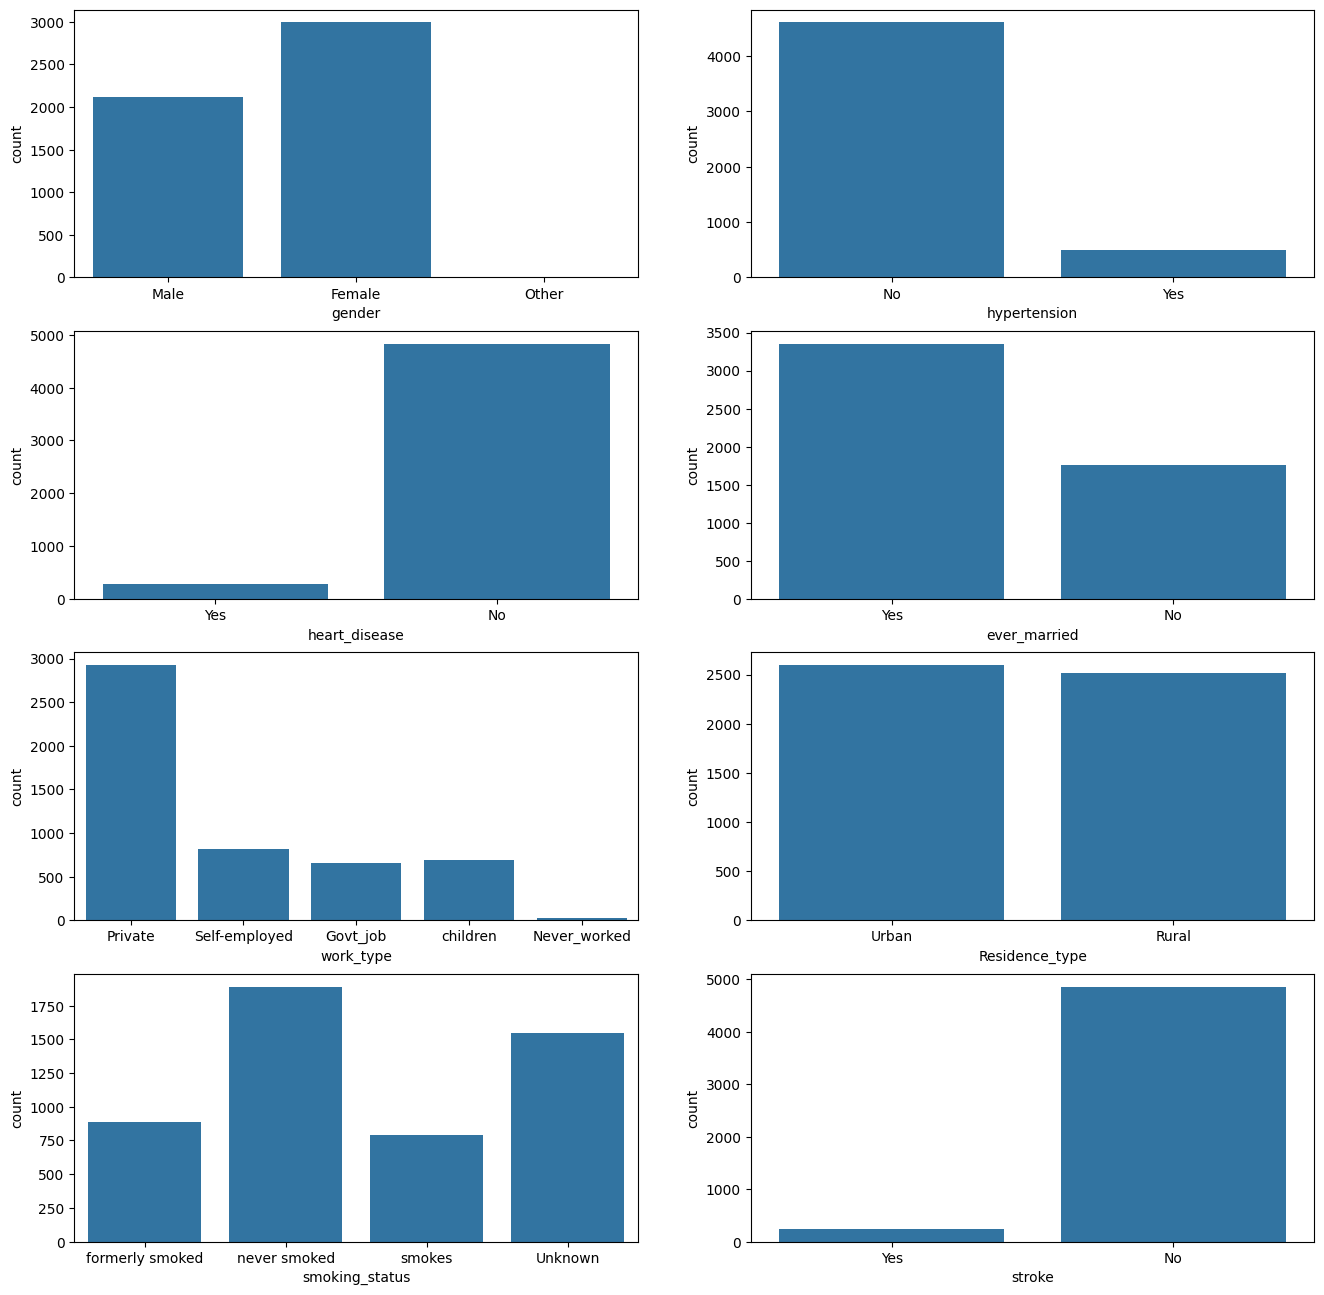

In [12]:
# Univariate analysis of categorical features

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))

# Countplot for gender,hypertension, heart_disease,ever_married,
   #work_type, Residence_type,smoking_status,stroke
    

sns.countplot(ax=axes[0,0],data=df,x='gender')
sns.countplot(ax=axes[0,1],data=df,x='hypertension')
sns.countplot(ax=axes[1,0],data=df,x='heart_disease')
sns.countplot(ax=axes[1,1],data=df,x='ever_married')
sns.countplot(ax=axes[2,0],data=df,x='work_type')
sns.countplot(ax=axes[2,1],data=df,x='Residence_type')
sns.countplot(ax=axes[3,0],data=df,x='smoking_status')
sns.countplot(ax=axes[3,1],data=df,x='stroke')

# Show the plot
plt.show()

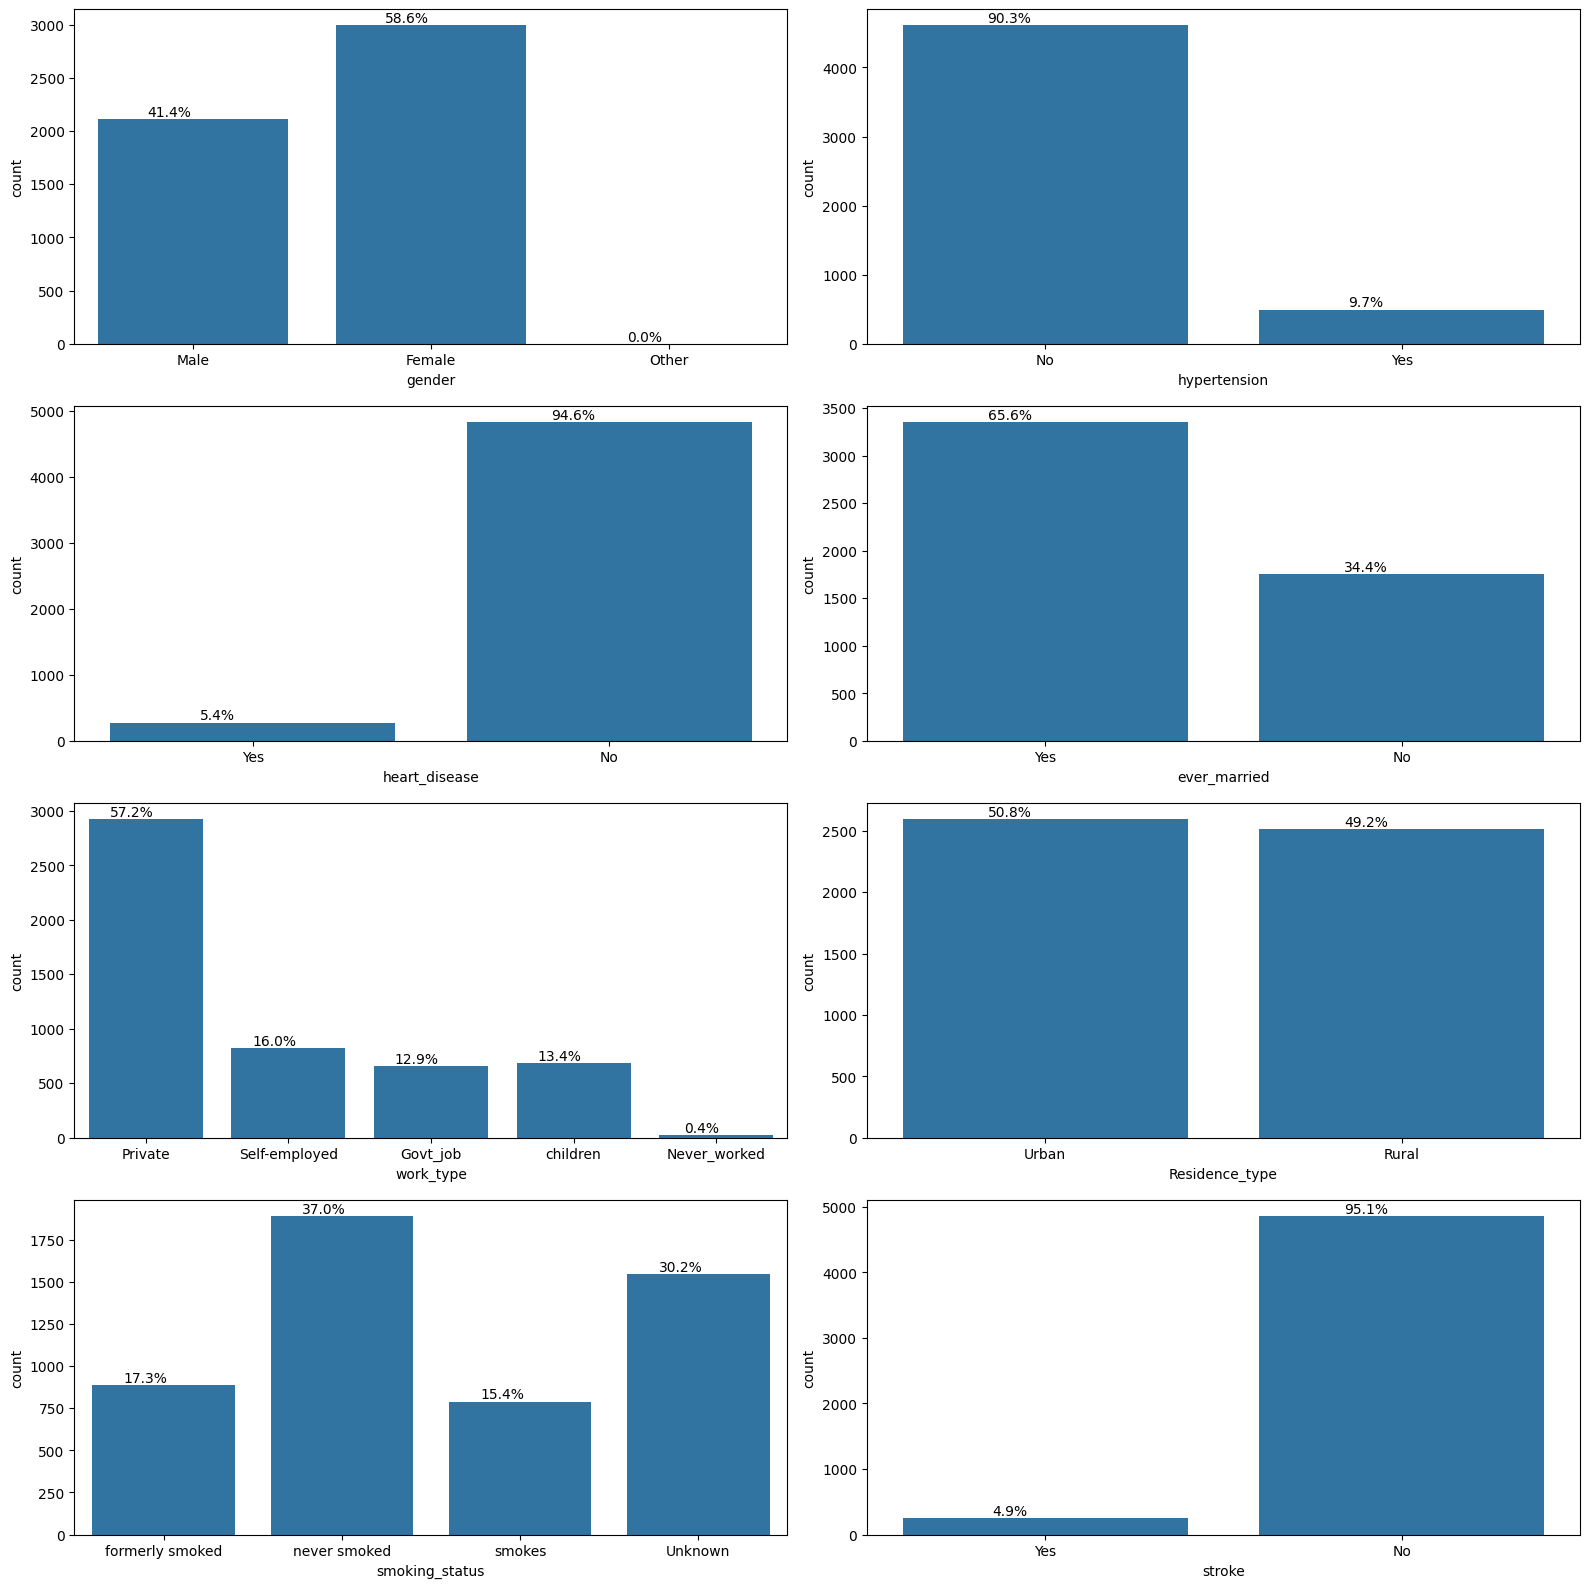

In [34]:
# Univariate analysis of categorical features with percentages

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))

# List of categorical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                         'work_type', 'Residence_type', 'smoking_status', 'stroke']

# Loop through each feature and create countplot with percentages
for feature, ax in zip(categorical_features, axes.flatten()):
    # Plot countplot
    sns.countplot(data=df, x=feature, ax=ax)
    
    # Calculate and display percentages on top of each bar
    total = len(df[feature])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


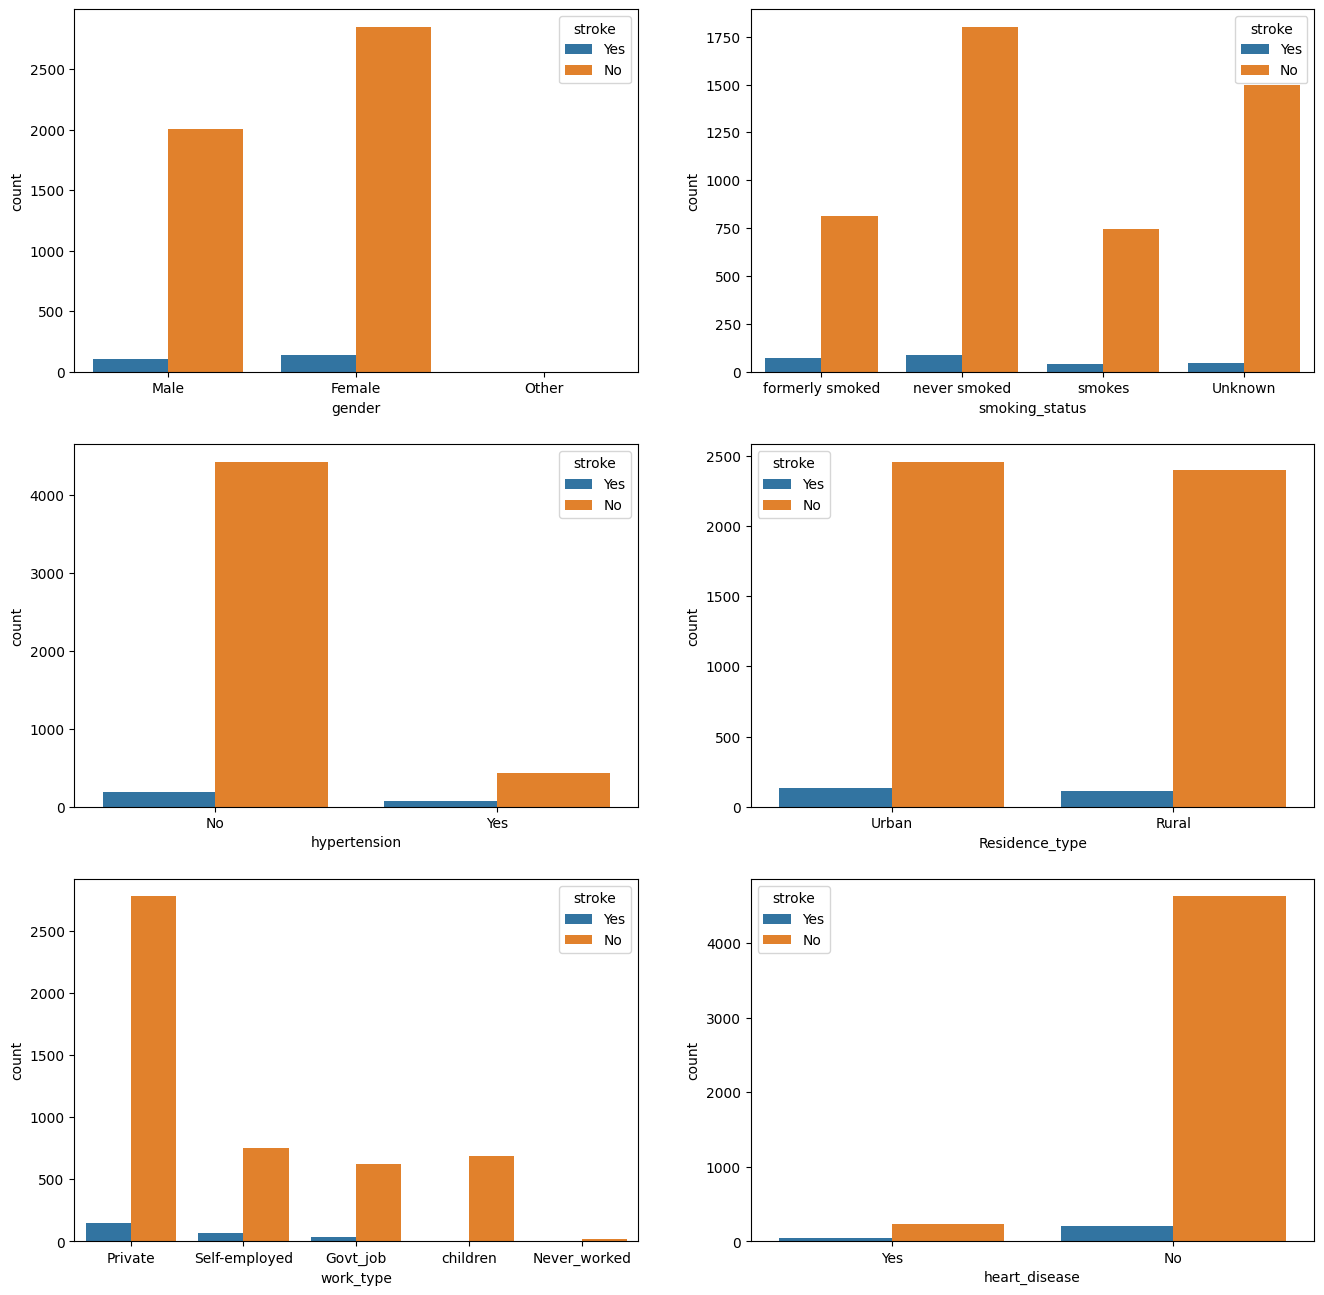

In [14]:
# Bivariate analysis

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))

# Countplot for gender,hypertension, heart_disease,ever_married,
   #work_type, Residence_type,smoking_status,stroke
    
sns.countplot(ax=axes[0,0], data=df, x="gender", hue= "stroke")
sns.countplot(ax=axes[0,1], data=df, x="smoking_status", hue= "stroke")
sns.countplot(ax=axes[1,0], data=df, x="hypertension", hue= "stroke")
sns.countplot(ax=axes[1,1], data=df, x="Residence_type", hue= "stroke")
sns.countplot(ax=axes[2,0], data=df, x="work_type", hue= "stroke")
sns.countplot(ax=axes[2,1], data=df, x="heart_disease", hue= "stroke")

# Show the plot
plt.show()

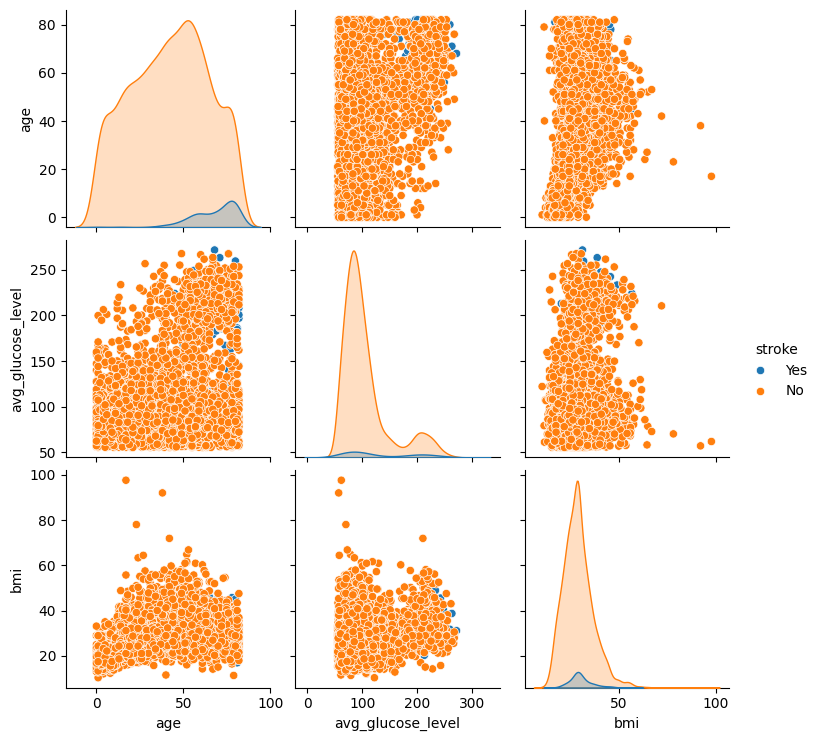

In [15]:
# Multivariate Analysis

sns.pairplot(data=df, hue ='stroke')

## **Insights from the EDA:**

### **Baseline Characteristics:**
The dataset reveals a stroke prevalence of 4.9%, with a sample size (n) of 249. Breaking down the gender distribution, "Female" emerges as the predominant category at 58.6%, followed by "Male" at 41.4%. Notably,"Other" gender category is minimally represented, comprising just one individual (<0.1%). 
The age spectrum ranges from 0 to 82, reflecting a diverse range, with a median age of 45. Examining the distribution by worktype, the majority fall under the "Private" category at 57.2%, followed by "Self-employed" at 16.0%, "Children" at 13.4%, "Government job" at 12.9%, and "Never worked" at 0.4%.

In terms of smoking status, the distribution is as follows: "Never smoked" constitutes 37.0%, "Unknown" stands at 30.2%, "Formerly smoked" at 17.3%, and "Smokes" at 15.4%.
Hypertension is prevalent in 90.3% (n=4612) of the cases, while heart disease is present in 94.6% (n=4834) of the instances. These findings underscore the substantial impact of these health conditions within the dataset.


### **Correlations between various features** : 
These correlations indicate the strength and direction of linear relationships between pairs of variables. However, before moving forward, it is important to remind that **Correlation does not necessarily mean causation**.

**-Age:** Moderate positive correlation with BMI (0.364), ever-married status (0.773), heart disease (0.298), hypertension (0.283), and work type (0.500).

**-Average Glucose Level:** Weak positive correlation with age (0.145) and BMI (0.114).

**-BMI:** Moderate positive correlation with age (0.364) and ever-married status (0.412). Weak positive correlation with average glucose level (0.114).

**-Ever Married:** Strong positive correlation with age (0.773) and work type (0.567). Moderate positive correlation with BMI (0.412) and hypertension (0.163). Weak positive correlation with average glucose level (0.179), heart disease (0.113), and smoking status (0.342).

**-Heart Disease:** Moderate positive correlation with age (0.298) and hypertension (0.106). Weak positive correlation with average glucose level (0.178) and smoking status (0.090).

**-Hypertension:** Moderate positive correlation with age (0.283) and ever-married status (0.163). Weak positive correlation with average glucose level (0.207).

**-Smoking Status:** Weak positive correlation with age (0.322) and ever-married status (0.342).

**-Stroke:** Negligible correlation with other variables provided in the table.


# 3. Feature Engineering

In [23]:
### Re-import initial dataset

#Importing the dataset
data = pd.read_csv("data.csv")

# drop id column
data = data.drop(['id'], axis=1)

# Input missing values in BMI

data["bmi"].fillna(data["bmi"].mean(), inplace= True)

In [25]:
# Encode categorical features
import pandas as pd

data_encoded= pd.get_dummies(data, columns=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)


In [26]:
# Def for oversampling train  set using SMOTE
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(data_encoded.drop('stroke', axis=1), data_encoded['stroke'])


In [27]:
#Split dataset into train, validation and testsets
from sklearn.model_selection import train_test_split

X_train,X_temporary, Y_train, Y_temporary= train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temporary, Y_temporary, test_size=0.5, random_state=42)

In [28]:
# Scaling / Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


# 4. Predictions (Classification Techniques)

 #### 4.a. Predictions

In [29]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

lor_model= LogisticRegression(random_state=42)
lor_model.fit(X_train, Y_train)
lor_pred= lor_model.predict(X_valid)


#Support vector machine
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_valid)


#Decision tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)
dt_pred = dt_model.predict(X_valid)


#Random forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_valid)

 #### 4.b. Evaluation

In [30]:
# importing libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [31]:
# Evaluate models
models = [lor_model, svm_model, rf_model, dt_model]
model_names = ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'Decision Tree']

for model, name in zip(models, model_names):
    Y_pred = model.predict(X_test)
    
    print(f"\nMetrics for {name}:")
    print("Accuracy:", accuracy_score(Y_test, Y_pred))
    print("Precision:", precision_score(Y_test, Y_pred))
    print("Recall:", recall_score(Y_test, Y_pred))
    print("F1 Score:", f1_score(Y_test, Y_pred))
    print("Jaccard Score:", jaccard_score(Y_test, Y_pred))


Metrics for Logistic Regression:
Accuracy: 0.8636052090472927
Precision: 0.8593530239099859
Recall: 0.8605633802816901
F1 Score: 0.8599577762139338
Jaccard Score: 0.754320987654321

Metrics for Support Vector Machine:
Accuracy: 0.8834818368745716
Precision: 0.8802816901408451
Recall: 0.8802816901408451
F1 Score: 0.8802816901408451
Jaccard Score: 0.7861635220125787

Metrics for Random Forest:
Accuracy: 0.9513365318711446
Precision: 0.9468531468531468
Recall: 0.9535211267605633
F1 Score: 0.9501754385964911
Jaccard Score: 0.9050802139037433

Metrics for Decision Tree:
Accuracy: 0.9204934886908842
Precision: 0.9024390243902439
Recall: 0.9380281690140845
F1 Score: 0.919889502762431
Jaccard Score: 0.8516624040920716


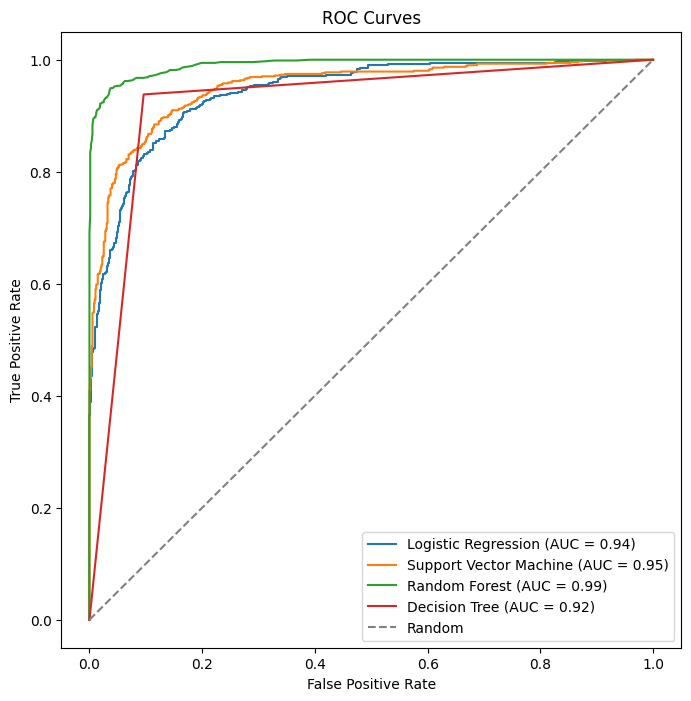

In [32]:
# Function to plot ROC curve
def plot_roc_curve(model, X_test, Y_test, label):
    Y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curves
plt.figure(figsize=(8, 8))
plot_roc_curve(lor_model, X_test, Y_test, 'Logistic Regression')
plot_roc_curve(svm_model, X_test, Y_test, 'Support Vector Machine')
plot_roc_curve(rf_model, X_test, Y_test, 'Random Forest')
plot_roc_curve(dt_model, X_test, Y_test, 'Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

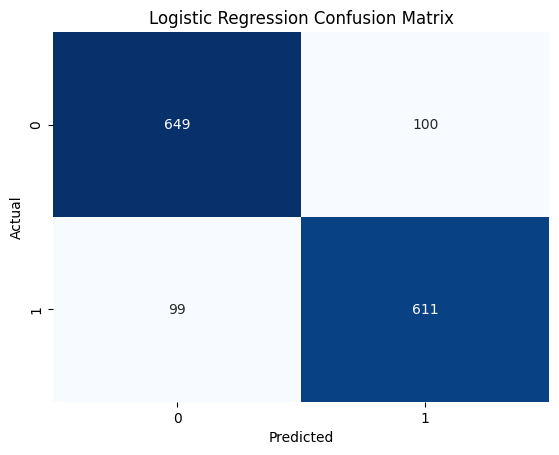

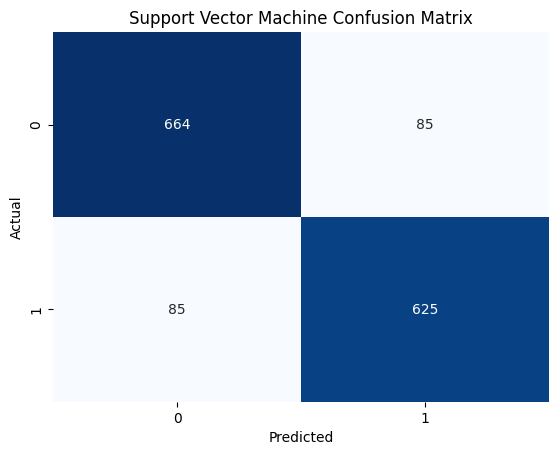

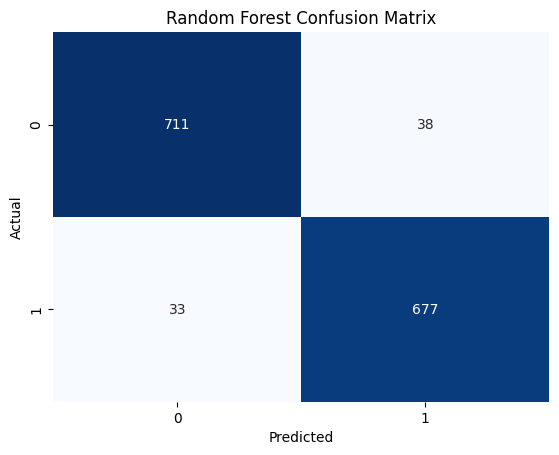

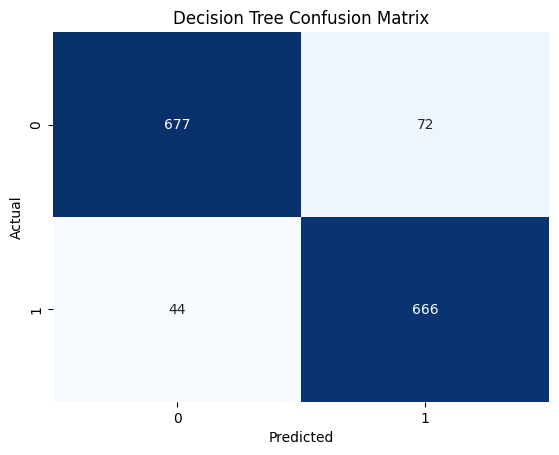

In [33]:

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, Y_test, title):
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(lor_model, X_test, Y_test, 'Logistic Regression Confusion Matrix')
plot_confusion_matrix(svm_model, X_test, Y_test, 'Support Vector Machine Confusion Matrix')
plot_confusion_matrix(rf_model, X_test, Y_test, 'Random Forest Confusion Matrix')
plot_confusion_matrix(dt_model, X_test, Y_test, 'Decision Tree Confusion Matrix')


## Insights from classification algorithms performance evaluation:

1. **Accuracy:**
   - Random Forest had the highest accuracy (95.1%), indicating superior performance in terms of overall correct predictions on the test set.
   - Support Vector Machine also demonstrated high accuracy (88.3%).
   - Logistic Regression and Decision Tree exhibited slightly lower accuracies (86.4% and 92.0%, respectively).

2. **Precision:**
   - Random Forest achieved the highest precision (94.7%), suggesting a low false positive rate and proficiency in correctly identifying positive cases.
   - Support Vector Machine and Logistic Regression recorded similar precision values, around 88%, signifying a relatively low rate of false positives.
   - Decision Tree exhibited a lower precision compared to the other models (90.2%).

3. **Recall:**
   - Random Forest achieved the highest recall (95.4%), demonstrating effectiveness in capturing a high proportion of actual positive cases.
   - Decision Tree and Support Vector Machine showed similar recall values (93.8% and 88.0%, respectively).
   - Logistic Regression displayed a slightly lower recall (86.1%).

4. **F1 Score:**
   - Random Forest attained the highest F1 score (95.0%), representing the harmonic mean of precision and recall.
   - Decision Tree, Support Vector Machine, and Logistic Regression obtained F1 scores of 91.9%, 88.0%, and 86.0%, respectively.

5. **Jaccard Score:**
   - Random Forest secured the highest Jaccard score (90.5%).
   - Decision Tree, Support Vector Machine, and Logistic Regression yielded Jaccard scores of 85.2%, 78.6%, and 75.4%, respectively.

6. **AUC (Area Under the Curve):**
   - Random Forest and Support Vector Machine recorded the highest AUC values (99% and 95%, respectively), indicating excellent discrimination between positive and negative cases.
   - Decision Tree and Logistic Regression achieved AUC values of 92% and 94%, respectively.

**Conclusion:**
- Random Forest outperformed the other models across most metrics, establishing itself as a robust candidate for this classification task (for stroke prediction).
- Support Vector Machine also demonstrated strong performance, particularly in terms of AUC.
- Logistic Regression and Decision Tree, while exhibiting good performance, showcased slightly lower metrics compared to Random Forest and Support Vector Machine.